In [29]:
import jax
import mujoco
from mujoco import mjx
import jax.numpy as jnp

In [4]:
XML=r"""
<mujoco>
<worldbody>
 <body>
   <freejoint/>
   <geom size=".15" mass="1" type="sphere"/>
 </body>
</worldbody>
</mujoco>
"""

model = mujoco.MjModel.from_xml_string(XML)
mjx_model = mjx.device_put(model)

@jax.vmap
def batched_step(vel):
    mjx_data = mjx.make_data(mjx_model)
    qvel = mjx_data.qvel.at[0].set(vel)
    mjx_data = mjx_data.replace(qvel=qvel)
    pos = mjx.step(mjx_model, mjx_data).qpos[0]
    return pos

/home/juan/anaconda3/lib/python3.9/site-packages/mujoco/mjx/_src/device.py:108: UserWarning: Solver mjSOL_NEWTON is not supported, reverting to CG.
  warnings.warn(f'Solver {name} is not supported, reverting to CG.')


In [12]:
vel = jax.numpy.arange(0.0, 1.0, 0.001)
vel.shape

(1000,)

In [13]:
pos = jax.jit(batched_step)(vel)
print(pos)

[0.00000000e+00 2.00000022e-06 4.00000044e-06 6.00000021e-06
 8.00000089e-06 1.00000016e-05 1.20000004e-05 1.40000011e-05
 1.60000018e-05 1.80000025e-05 2.00000031e-05 2.20000020e-05
 2.40000008e-05 2.60000015e-05 2.80000022e-05 3.00000029e-05
 3.20000036e-05 3.40000042e-05 3.60000049e-05 3.80000056e-05
 4.00000063e-05 4.20000069e-05 4.40000040e-05 4.60000047e-05
 4.80000017e-05 5.00000024e-05 5.20000031e-05 5.40000037e-05
 5.60000044e-05 5.80000051e-05 6.00000058e-05 6.20000064e-05
 6.40000071e-05 6.60000005e-05 6.80000085e-05 7.00000019e-05
 7.20000098e-05 7.40000032e-05 7.60000112e-05 7.80000046e-05
 8.00000125e-05 8.20000059e-05 8.40000139e-05 8.60000073e-05
 8.80000080e-05 9.00000086e-05 9.20000093e-05 9.40000100e-05
 9.60000034e-05 9.80000113e-05 1.00000005e-04 1.02000013e-04
 1.04000006e-04 1.06000014e-04 1.08000007e-04 1.10000015e-04
 1.12000009e-04 1.14000009e-04 1.16000010e-04 1.18000011e-04
 1.20000012e-04 1.22000012e-04 1.24000013e-04 1.26000014e-04
 1.28000014e-04 1.300000

In [17]:
%%time
pos = jax.jit(batched_step)(vel)
print(pos)

[0.00000000e+00 2.00000022e-06 4.00000044e-06 6.00000021e-06
 8.00000089e-06 1.00000016e-05 1.20000004e-05 1.40000011e-05
 1.60000018e-05 1.80000025e-05 2.00000031e-05 2.20000020e-05
 2.40000008e-05 2.60000015e-05 2.80000022e-05 3.00000029e-05
 3.20000036e-05 3.40000042e-05 3.60000049e-05 3.80000056e-05
 4.00000063e-05 4.20000069e-05 4.40000040e-05 4.60000047e-05
 4.80000017e-05 5.00000024e-05 5.20000031e-05 5.40000037e-05
 5.60000044e-05 5.80000051e-05 6.00000058e-05 6.20000064e-05
 6.40000071e-05 6.60000005e-05 6.80000085e-05 7.00000019e-05
 7.20000098e-05 7.40000032e-05 7.60000112e-05 7.80000046e-05
 8.00000125e-05 8.20000059e-05 8.40000139e-05 8.60000073e-05
 8.80000080e-05 9.00000086e-05 9.20000093e-05 9.40000100e-05
 9.60000034e-05 9.80000113e-05 1.00000005e-04 1.02000013e-04
 1.04000006e-04 1.06000014e-04 1.08000007e-04 1.10000015e-04
 1.12000009e-04 1.14000009e-04 1.16000010e-04 1.18000011e-04
 1.20000012e-04 1.22000012e-04 1.24000013e-04 1.26000014e-04
 1.28000014e-04 1.300000

In [18]:
gpu_device = jax.devices('gpu')[0]
gpu_device

cuda(id=0)

In [22]:
mj_model = mujoco.MjModel.from_xml_path("models/go1/go1_scene_jax_no_collision.xml")

In [23]:
mjx_model = mjx.device_put(mj_model)

/home/juan/anaconda3/lib/python3.9/site-packages/mujoco/mjx/_src/device.py:108: UserWarning: Solver mjSOL_NEWTON is not supported, reverting to CG.
  warnings.warn(f'Solver {name} is not supported, reverting to CG.')


In [24]:
renderer = mujoco.Renderer(mj_model)

In [25]:
mjx_data = mjx.make_data(mjx_model)

In [91]:
mu = 0.0  # Mean
sigma = 0.2  # Standard deviation
n = 1000
n_ctrl = 12

In [92]:
key = jax.random.PRNGKey(0)

# Generate a random array of size m x n with Gaussian (normal) noise
r_m = jax.random.normal(key, (n, n_ctrl))
u = mu + sigma * r_m

In [93]:
pos_init = jnp.repeat(jnp.array([[0.,    0.,    0.08,  1.,    0.,    0.,    0.,   -0.1,   1.34, -2.83,  0.1,   1.34,
                                  -2.83, -0.1,   1.34, -2.83,  0.1,   1.34, -2.83]]), n, axis=0)

In [94]:
@jax.vmap
def batched_step(pos, u):
    mjx_data = mjx.make_data(mjx_model)
    #qpos = mjx_data.qpos.at[0].set(pos)
    mjx_data = mjx_data.replace(qpos=pos)
    mjx_data = mjx_data.replace(ctrl=u)
    pos = mjx.step(mjx_model, mjx_data).qpos
    vel = mjx.step(mjx_model, mjx_data).qvel
    return jnp.concatenate([pos, vel])

In [95]:
step_gpu_jit = jax.jit(batched_step, device=gpu_device)

In [120]:
%%time
pos = step_gpu_jit(pos_init, u)

CPU times: user 158 ms, sys: 1.88 ms, total: 160 ms
Wall time: 159 ms


In [1]:
import mujoco
import mujoco_viewer
import copy as cp
import matplotlib.pyplot as plt
from control.mppi_gait import MPPI
import numpy as np

In [2]:
import mujoco_viewer

In [3]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [4]:
import os

In [5]:
model_sim = mujoco.MjModel.from_xml_path("models/go1/go1_scene_mppi.xml")

In [6]:
joint_names = ["RL_hip", "RR_hip", "FL_hip", "FR_hip", 
              "RL_thigh", "RR_thigh", "FL_thigh", "FR_thigh", 
              "RL_calf", "RR_calf", "FL_calf", "FR_calf"]

In [7]:
for joint in joint_names:
    print(model_sim.actuator(joint).biasprm)

[  0. -80.  -3.   0.   0.   0.   0.   0.   0.   0.]
[  0. -80.  -3.   0.   0.   0.   0.   0.   0.   0.]
[  0. -80.  -3.   0.   0.   0.   0.   0.   0.   0.]
[  0. -80.  -3.   0.   0.   0.   0.   0.   0.   0.]
[  0. -80.  -3.   0.   0.   0.   0.   0.   0.   0.]
[  0. -80.  -3.   0.   0.   0.   0.   0.   0.   0.]
[  0. -80.  -3.   0.   0.   0.   0.   0.   0.   0.]
[  0. -80.  -3.   0.   0.   0.   0.   0.   0.   0.]
[  0. -80.  -3.   0.   0.   0.   0.   0.   0.   0.]
[  0. -80.  -3.   0.   0.   0.   0.   0.   0.   0.]
[  0. -80.  -3.   0.   0.   0.   0.   0.   0.   0.]
[  0. -80.  -3.   0.   0.   0.   0.   0.   0.   0.]


In [8]:
for joint in joint_names:
    print(model_sim.actuator('FL_calf').gainprm)

[80.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[80.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[80.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[80.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[80.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[80.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[80.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[80.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[80.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[80.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[80.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[80.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [9]:
dt_sim = 0.01
model_sim.opt.timestep = dt_sim
data_sim = mujoco.MjData(model_sim)

In [10]:
viewer = mujoco_viewer.MujocoViewer(model_sim, data_sim, 'offscreen')

In [11]:
# reset robot (keyframes are defined in the xml)
mujoco.mj_resetDataKeyframe(model_sim, data_sim, 1) # stand position
mujoco.mj_forward(model_sim, data_sim)
q_init = cp.deepcopy(data_sim.qpos) # save reference pose
v_init = cp.deepcopy(data_sim.qvel) # save reference pose

In [12]:
print("Configuration: {}".format(q_init)) # save reference pose

Configuration: [ 0.     0.     0.08   1.     0.     0.     0.     0.073  1.34  -2.83
  0.073  1.34  -2.83   0.073  1.34  -2.83   0.073  1.34  -2.83 ]


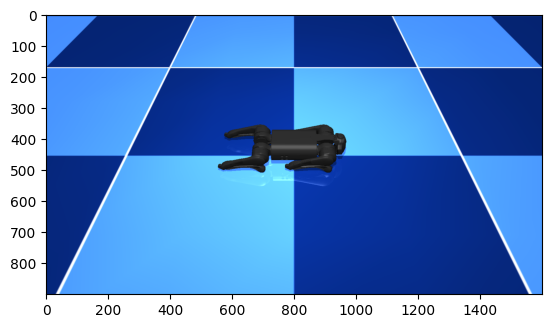

In [13]:
img = viewer.read_pixels()
plt.imshow(img)

In [14]:
model_sim.name_jntadr

array([122, 123, 136, 151, 165, 178, 193, 207, 220, 235, 249, 262, 277],
      dtype=int32)

In [15]:
model_sim.name_actuatoradr

array([624, 631, 640, 648, 655, 664, 672, 679, 688, 696, 703, 712],
      dtype=int32)

In [16]:
model_sim.names

b'Quadruped Go1\x00world\x00trunk\x00FR_hip\x00FR_thigh\x00FR_calf\x00FL_hip\x00FL_thigh\x00FL_calf\x00RR_hip\x00RR_thigh\x00RR_calf\x00RL_hip\x00RL_thigh\x00RL_calf\x00\x00FR_hip_joint\x00FR_thigh_joint\x00FR_calf_joint\x00FL_hip_joint\x00FL_thigh_joint\x00FL_calf_joint\x00RR_hip_joint\x00RR_thigh_joint\x00RR_calf_joint\x00RL_hip_joint\x00RL_thigh_joint\x00RL_calf_joint\x00floor\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00FR\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00FL\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00RR\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00RL\x00head\x00imu\x00FR\x00FL\x00RR\x00RL\x00tracking\x00\x00spotlight\x00trunk\x00hip\x00thigh_mirror\x00calf\x00thigh\x00blue_grid\x00grey_grid\x00skybox\x00blue_grid\x00grey_grid\x00self\x00self_default\x00self_highlight\x00effector\x00effector_default\x00effector_highlight\x00decoration\x00eye\x00target\x00target_default\x00target_highlight\x00site\x00dark\x00FR_hip\x00FR_thigh\x00FR_c

In [17]:
model_sim.njnt

13

In [18]:
def get_joint_names(model):
    names = []
    for i in range(model.njnt-1):
        name_adr = model.name_jntadr[i+1]
        name = model.names[name_adr:].split(b'\x00', 1)[0].decode('utf-8')
        names.append(name)
    return names

In [19]:
# Get actuator names
joint_names = get_joint_names(model_sim)

# Print actuator names
for name in joint_names:
    print(name)

FR_hip_joint
FR_thigh_joint
FR_calf_joint
FL_hip_joint
FL_thigh_joint
FL_calf_joint
RR_hip_joint
RR_thigh_joint
RR_calf_joint
RL_hip_joint
RL_thigh_joint
RL_calf_joint


In [20]:
def get_actuator_names(model):
    names = []
    for i in range(model.nu):
        name_adr = model.name_actuatoradr[i]
        name = model.names[name_adr:].split(b'\x00', 1)[0].decode('utf-8')
        names.append(name)
    return names

# Get actuator names
actuator_names = get_actuator_names(model_sim)

# Print actuator names
for name in actuator_names:
    print(name)

FR_hip
FR_thigh
FR_calf
FL_hip
FL_thigh
FL_calf
RR_hip
RR_thigh
RR_calf
RL_hip
RL_thigh
RL_calf


In [21]:
# reset robot (keyframes are defined in the xml)
mujoco.mj_resetDataKeyframe(model_sim, data_sim, 0) # stand position
mujoco.mj_forward(model_sim, data_sim)
q_ref_mj = cp.deepcopy(data_sim.qpos) # save reference pose
v_ref_mj = cp.deepcopy(data_sim.qvel) # save reference pose

In [22]:
print("Configuration: {}".format(q_ref_mj)) # save reference pose

Configuration: [ 0.    0.    0.26  1.    0.    0.    0.    0.    0.9  -1.8   0.    0.9
 -1.8   0.    0.9  -1.8   0.    0.9  -1.8 ]


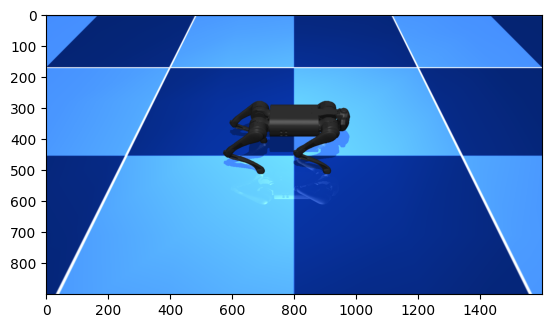

In [23]:
img = viewer.read_pixels()
plt.imshow(img)

## Debbug pd individual joints

In [24]:
tfinal = 1
tvec = np.linspace(0,tfinal,int(np.ceil(tfinal/dt_sim))+1)

In [25]:
mujoco.mj_resetDataKeyframe(model_sim, data_sim, 2)
mujoco.mj_forward(model_sim, data_sim)

In [26]:
print("Configuration: {}".format(data_sim.qpos))

Configuration: [ 0.    0.    0.08  1.    0.    0.    0.   -0.1   1.34 -2.83  0.1   1.34
 -2.83 -0.1   1.34 -2.83  0.1   1.34 -2.83]


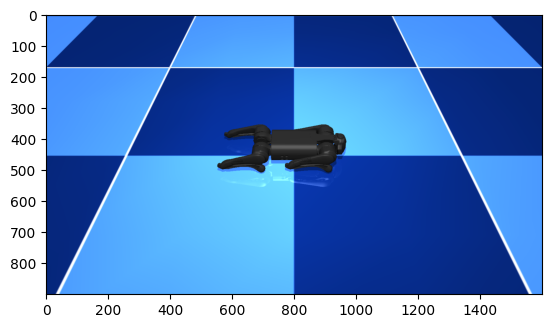

In [27]:
img = viewer.read_pixels()
plt.imshow(img)

In [28]:
%%time
anim_imgs = []
sim_inputs = []
x_states = []
for ticks, ti in enumerate(tvec):
    q_curr = cp.deepcopy(data_sim.qpos) # save reference pose
    v_curr = cp.deepcopy(data_sim.qvel) # save reference pose
    x = np.concatenate([q_curr, v_curr])
    
    u_joints = [-0.7, 1.34, -2.83, #"FR_hip", "FR_thigh", "FR_calf",
                0.7, 1.34, -2.83, #"FL_hip", "FL_thigh", "FL_calf",
                -0.7, 1.34, -2.83, #"RR_hip", "RR_thigh", "RR_calf",
                0.7, 1.34, -2.83] #"RL_hip", "RL_thigh", "RL_calf"
        
    data_sim.ctrl[:] = u_joints
    mujoco.mj_step(model_sim, data_sim)
    mujoco.mj_forward(model_sim, data_sim)
    img = viewer.read_pixels()
    anim_imgs.append(img)
    sim_inputs.append(u_joints)
    x_states.append(x)

CPU times: user 158 ms, sys: 258 ms, total: 416 ms
Wall time: 418 ms


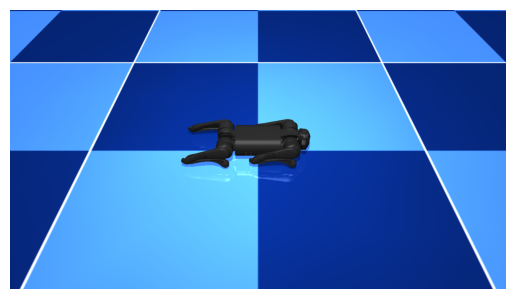

In [29]:
fig, ax = plt.subplots()
skip_frames = 5
interval = dt_sim*1000*skip_frames

def animate(i):
    ax.clear()
    ax.imshow(anim_imgs[i * skip_frames])  # Display the image, skipping frames
    ax.axis('off')

# Create animation, considering the reduced frame rate due to skipped frames
ani = FuncAnimation(fig, animate, frames=len(anim_imgs) // skip_frames, interval=interval)  # 50 ms for 20 Hz

# Display the animation
HTML(ani.to_jshtml())

In [30]:
sim_inputs_np = np.array(sim_inputs)
x_states_np = np.array(x_states)
q_pos = x_states_np[:, 7:19]

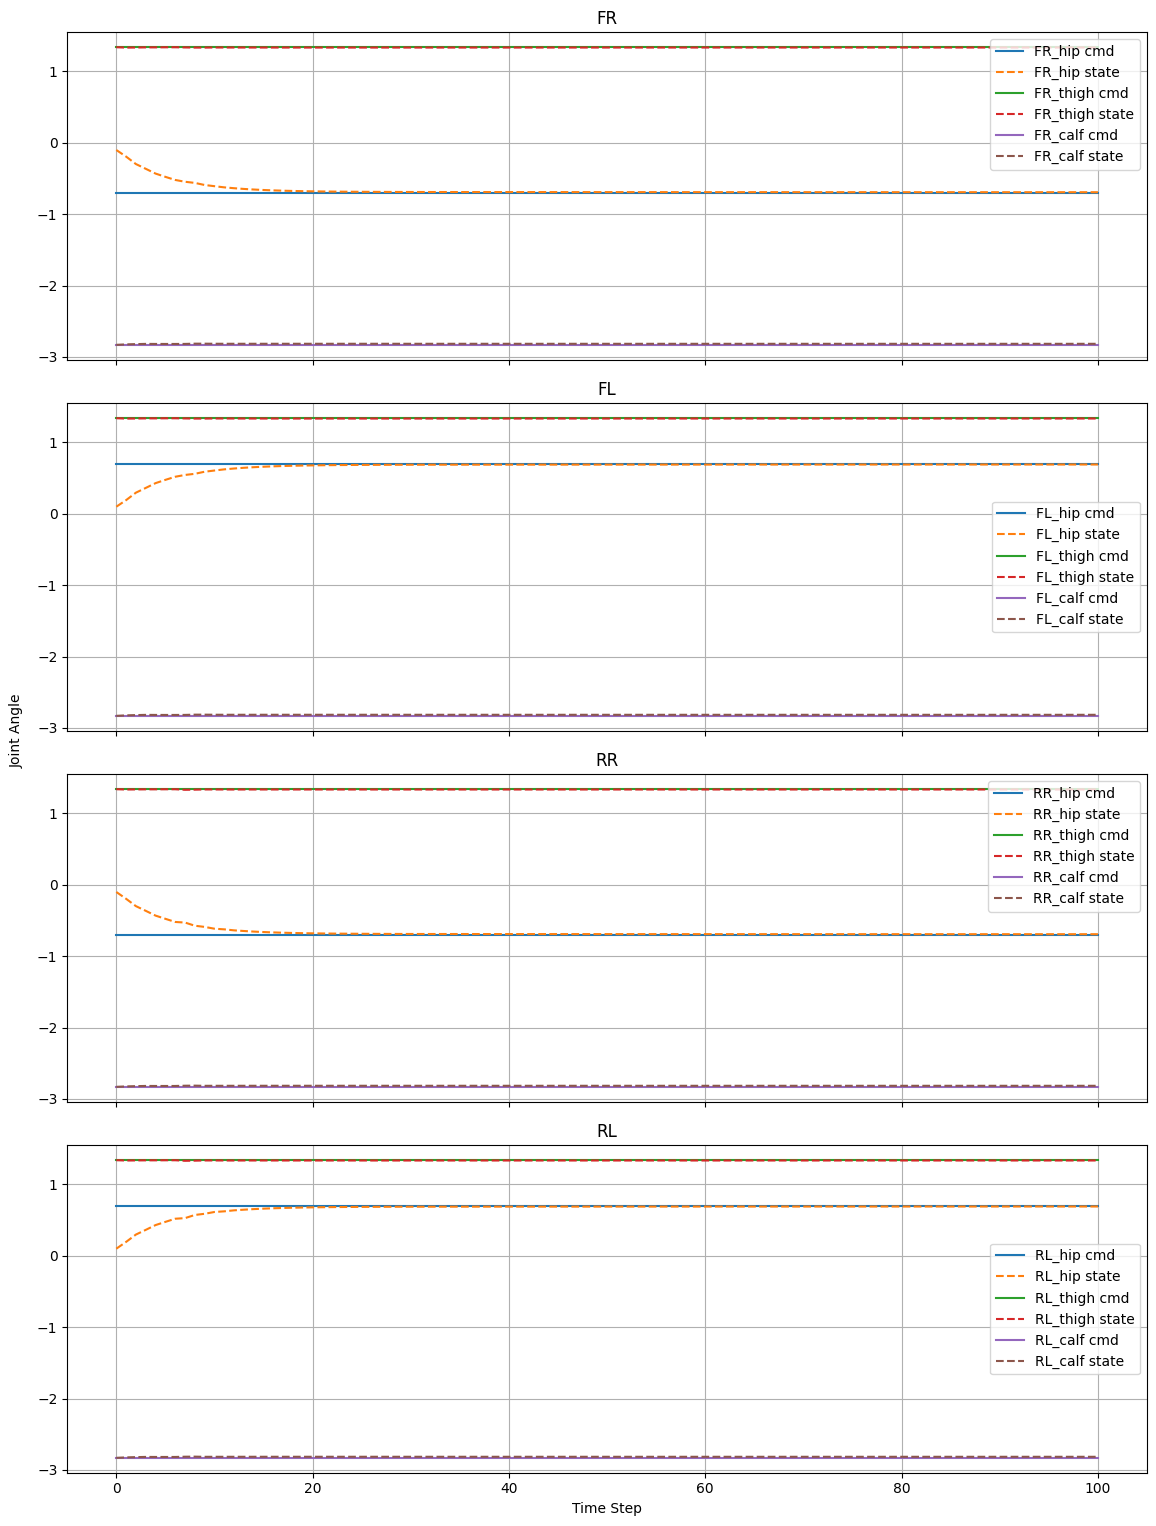

In [134]:
# Create a figure with 4 subplots (since 12 signals / 3 = 4)
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 16), sharex=True)

# Plot every 3 signals in a separate subplot
for i in range(4):
    start_idx = i * 3
    end_idx = start_idx + 3
    for j in range(start_idx, end_idx):
        axes[i].plot(sim_inputs_np[:, j], label=f'{actuator_names[j]} cmd')
        axes[i].plot(q_pos[:, j], linestyle='--', label=f'{actuator_names[j]} state')
    axes[i].legend()
    axes[i].grid(True)
    axes[i].set_title(f'{actuator_names[start_idx].split("_")[0]}')

# Set the x-axis label on the last subplot
axes[-1].set_xlabel('Time Step')

# Add a common y-axis label
fig.text(0.04, 0.5, 'Joint Angle', va='center', rotation='vertical')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0.05, 0, 1, 0.96])

# Show the plot
plt.show()


# # Create a figure with 4 subplots (since 12 signals / 3 = 4)
# #fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 16), sharex=True)
# fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 5), sharex=True)

# # Plot every 3 signals in a separate subplot
# for i in range(1):
#     start_idx = i * 3
#     end_idx = start_idx + 3
#     for j in range(start_idx, end_idx):
# #         axes[i].plot(sim_inputs_np[:, j], label=f'{actuator_names[j]} cmd')
# #         axes[i].plot(q_pos[:, j], linestyle='--', label=f'{actuator_names[j]} state')
# #     axes[i].legend()
# #     axes[i].grid(True)
# #     axes[i].set_title(f'{actuator_names[start_idx].split("_")[0]}')
#         axes.plot(sim_inputs_np[:, j], label=f'{actuator_names[j]} cmd')
#         axes.plot(q_pos[:, j], linestyle='--', label=f'{actuator_names[j]} state')
#     axes.legend()
#     axes.grid(True)
#     axes.set_title(f'{actuator_names[start_idx].split("_")[0]}')

# # Set the x-axis label on the last subplot
# #axes[-1].set_xlabel('Time Step')
# axes.set_xlabel('Time Step')

# # Add a common y-axis label
# fig.text(0.04, 0.5, 'Joint Angle', va='center', rotation='vertical')

# # Adjust layout to prevent overlap
# plt.tight_layout(rect=[0.05, 0, 1, 0.96])

# # Show the plot
# plt.show()

In [135]:
import rospy
import rosbag
from std_msgs.msg import String  # Adjust these imports based on your topics' message types
from sensor_msgs.msg import Image
from geometry_msgs.msg import PoseStamped
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [136]:
def read_bag_topics(file_path):
    # Open the bag file
    bag = rosbag.Bag(file_path)

    # Iterate through the messages in the specified topics
    for topic, msg, t in bag.read_messages(topics=['/topic1', '/topic2', '/topic3']):
        if topic == '/topic1':
            # Process messages from /topic1
            print(f"Time: {t.to_sec()} | Topic: {topic} | Message: {msg.data}")
        elif topic == '/topic2':
            # Process messages from /topic2
            print(f"Time: {t.to_sec()} | Topic: {topic} | Width: {msg.width} | Height: {msg.height}")
        elif topic == '/topic3':
            # Process messages from /topic3
            print(f"Time: {t.to_sec()} | Topic: {topic} | Position: ({msg.pose.position.x}, {msg.pose.position.y}, {msg.pose.position.z})")

    # Close the bag
    bag.close()

In [137]:
%ls rosbags

test.bag


In [138]:
file_path = "rosbags/test.bag"

In [139]:
bag = rosbag.Bag(file_path)

In [140]:
# topics=['/joint_controller_FR_hip/state', '/joint_controller_FR_thigh/state', '/joint_controller_FR_calf/state',
#         '/joint_controller_FL_hip/state', '/joint_controller_FL_thigh/state', '/joint_controller_FL_calf/state',
#         '/joint_controller_RR_hip/state', '/joint_controller_RR_thigh/state', '/joint_controller_RR_calf/state',
#         '/joint_controller_RL_hip/state', '/joint_controller_RL_thigh/state', '/joint_controller_RL_calf/state',
#         '/joint_controller_FR_hip/cmd', '/joint_controller_FR_thigh/cmd', '/joint_controller_FR_calf/cmd',
#         '/joint_controller_FL_hip/cmd', '/joint_controller_FL_thigh/cmd', '/joint_controller_FL_calf/cmd',
#         '/joint_controller_RR_hip/cmd', '/joint_controller_RR_thigh/cmd', '/joint_controller_RR_calf/cmd',
#         '/joint_controller_RL_hip/cmd', '/joint_controller_RL_thigh/cmd', '/joint_controller_RL_calf/cmd']

topics_cmd=['/joint_controller_FR_hip/cmd', '/joint_controller_FR_thigh/cmd', '/joint_controller_FR_calf/cmd',
            '/joint_controller_FL_hip/cmd', '/joint_controller_FL_thigh/cmd', '/joint_controller_FL_calf/cmd',
            '/joint_controller_RR_hip/cmd', '/joint_controller_RR_thigh/cmd', '/joint_controller_RR_calf/cmd',
            '/joint_controller_RL_hip/cmd', '/joint_controller_RL_thigh/cmd', '/joint_controller_RL_calf/cmd']

topics_state=['/joint_controller_FR_hip/state', '/joint_controller_FR_thigh/state', '/joint_controller_FR_calf/state',
              '/joint_controller_FL_hip/state', '/joint_controller_FL_thigh/state', '/joint_controller_FL_calf/state',
              '/joint_controller_RR_hip/state', '/joint_controller_RR_thigh/state', '/joint_controller_RR_calf/state',
              '/joint_controller_RL_hip/state', '/joint_controller_RL_thigh/state', '/joint_controller_RL_calf/state']

In [141]:
def read_topics_from_bag(bag_path, topics, start_time=None):
    bag = rosbag.Bag(bag_path)
    # Initialize a dictionary to store messages for each topic
    data_dict = {topic: [] for topic in topics}
    timestamps = []

    # Iterate through the messages in the specified topics
    for topic, msg, t in bag.read_messages(topics=topics):
        if start_time is None:
            start_time = msg.header.stamp.to_sec() #+ 0.01 #t.to_sec() #+ 1
        current_time = msg.header.stamp.to_sec() - start_time #t.to_sec() - start_time
        if current_time >= 0:
            timestamps.append(current_time)
            data_dict[topic].append((current_time, msg.q))
    bag.close()

    # Sort timestamps and create a time array
    timestamps = sorted(list(set(timestamps)))
    time_array = np.array(timestamps)

    # Create a data array where rows are signals and columns are time steps
    data_array = np.zeros((len(topics), len(timestamps)))

    for i, topic in enumerate(topics):
        topic_data = {t: q for t, q in data_dict[topic]}
        for j, t in enumerate(timestamps):
            if t in topic_data:
                data_array[i, j] = topic_data[t]
            else:
                data_array[i, j] = np.nan  # or some other value to indicate missing data
    return time_array, data_array, start_time

In [142]:
time_array_cmd, data_array_cmd, start_time = read_topics_from_bag(file_path, topics_cmd)

In [143]:
time_array_cmd

array([0.   , 0.001, 0.002, 0.021, 0.022, 0.041, 0.042, 0.061, 0.062,
       0.081, 0.082, 0.101, 0.102, 0.121, 0.122, 0.141, 0.142, 0.161,
       0.162, 0.181, 0.182, 0.201, 0.202, 0.221, 0.222, 0.241, 0.242,
       0.261, 0.262, 0.281, 0.282, 0.301, 0.302, 0.321, 0.322, 0.341,
       0.342, 0.361, 0.362, 0.381, 0.382, 0.401, 0.402, 0.421, 0.422,
       0.441, 0.442, 0.461, 0.462, 0.481, 0.482, 0.501, 0.502, 0.521,
       0.522, 0.541, 0.561, 0.562, 0.581, 0.582, 0.601, 0.602, 0.621,
       0.622, 0.641, 0.642, 0.661, 0.662, 0.681, 0.682, 0.701, 0.702,
       0.721, 0.722, 0.741, 0.742, 0.761, 0.762, 0.781, 0.782, 0.801,
       0.802])

In [144]:
time_array_cmd = time_array_cmd.round(2)
time_array_cmd

array([0.  , 0.  , 0.  , 0.02, 0.02, 0.04, 0.04, 0.06, 0.06, 0.08, 0.08,
       0.1 , 0.1 , 0.12, 0.12, 0.14, 0.14, 0.16, 0.16, 0.18, 0.18, 0.2 ,
       0.2 , 0.22, 0.22, 0.24, 0.24, 0.26, 0.26, 0.28, 0.28, 0.3 , 0.3 ,
       0.32, 0.32, 0.34, 0.34, 0.36, 0.36, 0.38, 0.38, 0.4 , 0.4 , 0.42,
       0.42, 0.44, 0.44, 0.46, 0.46, 0.48, 0.48, 0.5 , 0.5 , 0.52, 0.52,
       0.54, 0.56, 0.56, 0.58, 0.58, 0.6 , 0.6 , 0.62, 0.62, 0.64, 0.64,
       0.66, 0.66, 0.68, 0.68, 0.7 , 0.7 , 0.72, 0.72, 0.74, 0.74, 0.76,
       0.76, 0.78, 0.78, 0.8 , 0.8 ])

In [145]:
data_array_cmd[:,:5]

array([[-0.69999999, -0.69999999,         nan, -0.69999999,         nan],
       [ 1.34000003,         nan,  1.34000003,         nan,  1.34000003],
       [        nan, -2.82999992, -2.82999992,         nan, -2.82999992],
       [ 0.1       ,  0.1       ,         nan,  0.1       ,         nan],
       [ 1.34000003,         nan,  1.34000003,  1.34000003,         nan],
       [        nan, -2.82999992, -2.82999992,         nan, -2.82999992],
       [-0.1       , -0.1       ,         nan, -0.1       ,         nan],
       [ 1.34000003,  1.34000003,         nan,  1.34000003,         nan],
       [        nan, -2.82999992, -2.82999992,         nan, -2.82999992],
       [ 0.1       ,  0.1       ,         nan,  0.1       ,         nan],
       [ 1.34000003,  1.34000003,         nan,  1.34000003,         nan],
       [        nan, -2.82999992, -2.82999992,         nan, -2.82999992]])

In [146]:
time_array_state, data_array_state, _ = read_topics_from_bag(file_path, topics_state, start_time)

In [147]:
time_array_state

array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009, 0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017,
       0.018, 0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026,
       0.027, 0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035,
       0.036, 0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044,
       0.045, 0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053,
       0.054, 0.055, 0.056, 0.057, 0.058, 0.059, 0.06 , 0.061, 0.062,
       0.063, 0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07 , 0.071,
       0.072, 0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08 ,
       0.081, 0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089,
       0.09 , 0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098,
       0.099, 0.1  , 0.101, 0.102, 0.103, 0.104, 0.105, 0.106, 0.107,
       0.108, 0.109, 0.11 , 0.111, 0.112, 0.113, 0.114, 0.115, 0.116,
       0.117, 0.118, 0.119, 0.12 , 0.121, 0.122, 0.123, 0.124, 0.125,
       0.126, 0.127,

In [148]:
topics_state

['/joint_controller_FR_hip/state',
 '/joint_controller_FR_thigh/state',
 '/joint_controller_FR_calf/state',
 '/joint_controller_FL_hip/state',
 '/joint_controller_FL_thigh/state',
 '/joint_controller_FL_calf/state',
 '/joint_controller_RR_hip/state',
 '/joint_controller_RR_thigh/state',
 '/joint_controller_RR_calf/state',
 '/joint_controller_RL_hip/state',
 '/joint_controller_RL_thigh/state',
 '/joint_controller_RL_calf/state']

In [149]:
# time_array_state = time_array.round(3)
# time_array_state

In [150]:
# topics_state = topics[:12]
# topics_cmd = topics[12:]

# data_array_state = data_array[:12,:]
# data_array_cmd = data_array[12:,:]

In [151]:
def filter_data(time_arr, data_arr):
    # Group data by unique timestamps and calculate averages
    unique_times = np.unique(time_arr)
    grouped_values = defaultdict(list)

    for t, v in zip(time_arr, data_arr.T):
        grouped_values[t].append(v)

    # Calculate average for each signal at each unique time, ignoring NaNs
    averaged_values = {}
    for t, values in grouped_values.items():
        values = np.array(values)
        with np.errstate(invalid='ignore'):
            averaged_values[t] = np.nanmean(values, axis=0)

    # Convert to sorted arrays for time and values
    sorted_times = np.array(sorted(averaged_values.keys()))
    sorted_values = np.array([averaged_values[t] for t in sorted_times]).T
    return sorted_times, sorted_values

In [152]:
filter_time_cmd, filter_cmd = filter_data(time_array_cmd, data_array_cmd)

In [153]:
filter_time_state, filter_state = filter_data(time_array_state, data_array_state)

In [154]:
# print("Unique times:", sorted_times)
# print("Averaged values shape:", sorted_values.shape)

# # Output the averaged values for inspection
# for i, signal in enumerate(sorted_values):
#     print(f"Signal {i} averaged: {signal}")

In [155]:
filter_time_cmd *= 100
filter_time_state *= 100

Text(0.5, 0, 'Time Step')

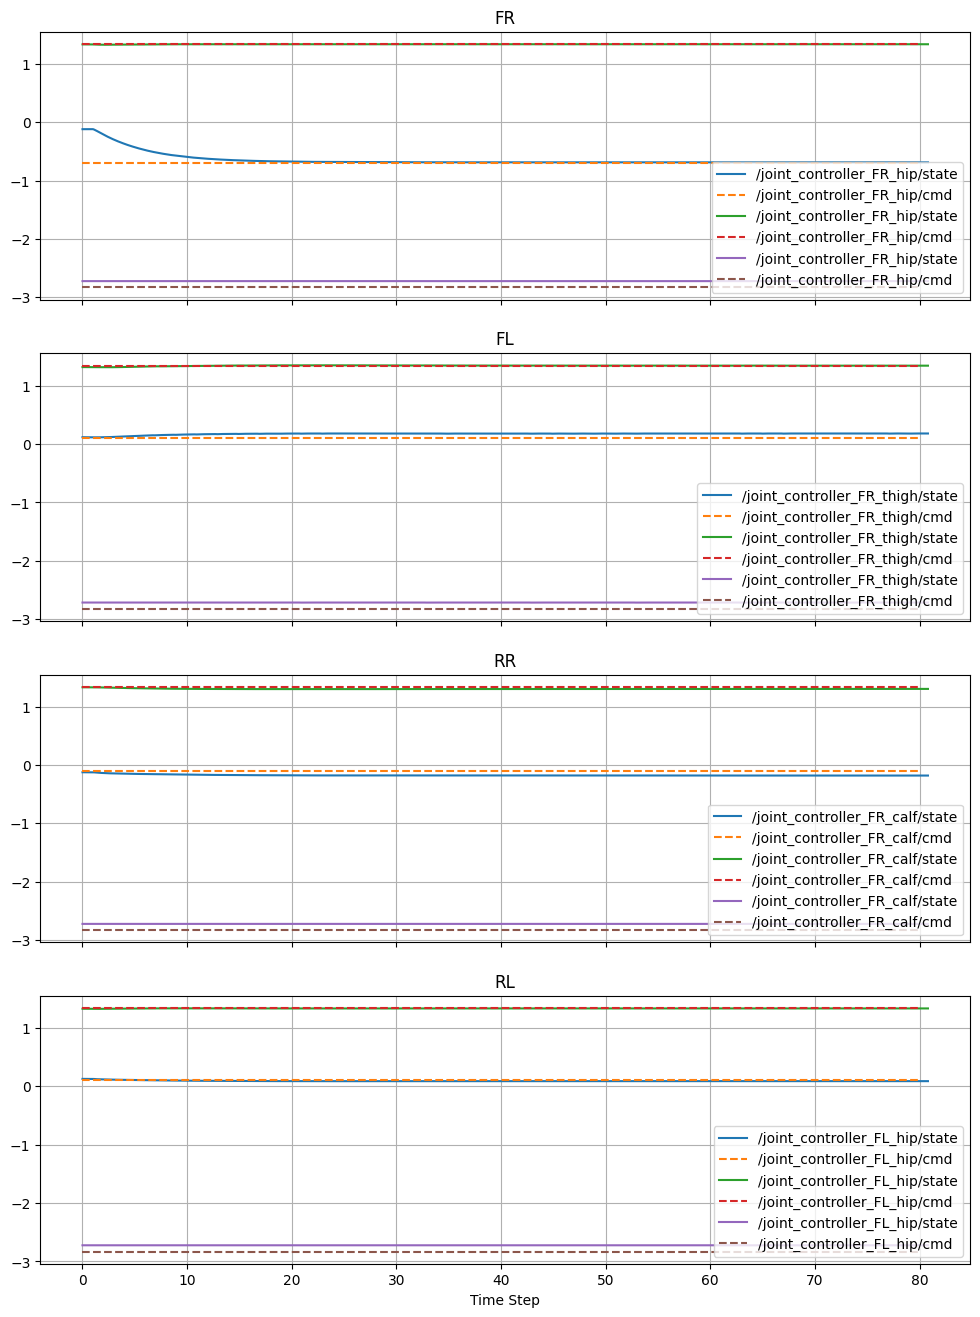

In [157]:
# Create a figure with 4 subplots (since 12 signals / 3 = 4)
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 16), sharex=True)

# Plot every 3 signals in a separate subplot
for i in range(4):
    start_idx = i * 3
    end_idx = start_idx + 3
    for j in range(start_idx, end_idx):        
        axes[i].plot(filter_time_state, filter_state[j, :], label=topics_state[i])
        axes[i].plot(filter_time_cmd, filter_cmd[j, :], linestyle='--', label=topics_cmd[i])
        #axes[i].scatter(filter_time_cmd, filter_cmd[j, :], label=topics_cmd[i])
    axes[i].legend(loc="lower right")
    axes[i].grid(True)
    axes[i].set_title(f'{actuator_names[start_idx].split("_")[0]}')

# Set the x-axis label on the last subplot
axes[-1].set_xlabel('Time Step')

# # Create a figure with 4 subplots (since 12 signals / 3 = 4)
# fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 5), sharex=True)

# # Plot every 3 signals in a separate subplot
# for i in range(1):
#     start_idx = i * 3
#     end_idx = start_idx + 3
#     for j in range(start_idx, end_idx):        
#         axes.plot(filter_time_state, filter_state[j, :], label=topics_state[i])
#         axes.plot(filter_time_cmd, filter_cmd[j, :], linestyle='--', label=topics_cmd[i])
#         #axes[i].scatter(filter_time_cmd, filter_cmd[j, :], label=topics_cmd[i])
#     axes.legend(loc="lower right")
#     axes.grid(True)
#     axes.set_title(f'{actuator_names[start_idx].split("_")[0]}')

# # Set the x-axis label on the last subplot
# axes.set_xlabel('Time Step')

In [ ]:
def plot_data(time_array, data_array, topics):
    fig, ax = plt.subplots(figsize=(12, 8))
    for i, topic in enumerate(topics):
        ax.plot(time_array, data_array[i, :], label=topic)
    ax.legend()
    ax.grid(True)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Signal Value')
    ax.set_title('Synchronized Signals from ROS Bag')
    plt.show()

In [ ]:
plot_data(time_array, data_array, topics)

In [ ]:
def read_bag_to_array(bag_file, topics, start_time=None):
    # Open the bag file
    bag = rosbag.Bag(bag_file)
    
    # Initialize a dictionary to store messages for each topic
    data_dict = {topic: [] for topic in topics}
    timestamps = []

    # Iterate through the messages in the specified topics
    for topic, msg, t in bag.read_messages(topics=topics):
        if start_time is None:
            start_time = t.to_sec()
        current_time = t.to_sec() - start_time
        timestamps.append(current_time)
        data_dict[topic].append((current_time, msg.q))
    
    bag.close()

    # Sort timestamps and create a time array
    timestamps = sorted(list(set(timestamps)))
    time_array = np.array(timestamps)

    # Create a data array where rows are signals and columns are time steps
    data_array = np.zeros((len(topics), len(timestamps)))

    for i, topic in enumerate(topics):
        topic_data = {t: q for t, q in data_dict[topic]}
        for j, t in enumerate(timestamps):
            if t in topic_data:
                data_array[i, j] = topic_data[t]
            else:
                data_array[i, j] = np.nan  # or some other value to indicate missing data

    return time_array, data_array

def plot_data(time_array, data_array, topics):
    fig, ax = plt.subplots(figsize=(12, 8))
    for i, topic in enumerate(topics):
        ax.plot(time_array, data_array[i, :], label=topic)
    ax.legend()
    ax.grid(True)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Signal Value')
    ax.set_title('Synchronized Signals from ROS Bag')
    plt.show()

In [ ]:
controller = MPPI()
controller.internal_ref = True
controller.reset_planner()

In [ ]:
q_curr = cp.deepcopy(data_sim.qpos) # save reference pose
v_curr = cp.deepcopy(data_sim.qvel) # save reference pose
x = np.concatenate([q_curr, v_curr])

In [ ]:
%%time
controller.update(x)

In [ ]:
controller.reset_planner()

In [ ]:
tfinal = 5
tvec = np.linspace(0,tfinal,int(np.ceil(tfinal/dt_sim))+1)

In [ ]:
mujoco.mj_resetDataKeyframe(model_sim, data_sim, 1)
mujoco.mj_forward(model_sim, data_sim)

In [ ]:
img = viewer.read_pixels()
plt.imshow(img)

In [ ]:
%%time
anim_imgs = []
sim_inputs = []
x_states = []
for ticks, ti in enumerate(tvec):
    q_curr = cp.deepcopy(data_sim.qpos) # save reference pose
    v_curr = cp.deepcopy(data_sim.qvel) # save reference pose
    x = np.concatenate([q_curr, v_curr])
    
    if ticks%2 == 0:
        u_joints = controller.update(x)  
        
    data_sim.ctrl[:] = u_joints
    mujoco.mj_step(model_sim, data_sim)
    mujoco.mj_forward(model_sim, data_sim)
    img = viewer.read_pixels()
    anim_imgs.append(img)
    sim_inputs.append(u_joints)
    x_states.append(x)

In [ ]:
x_states_np = np.array(x_states)

In [ ]:
x_states_np.shape

In [ ]:
plt.plot(x_states_np[:,19:22])

In [ ]:
plt.plot(x_states_np[:,22:25])

In [ ]:
plt.plot(x_states_np[:,3:7])

In [ ]:
plt.plot(x_states_np[:,7:10])

In [ ]:
plt.plot(x_states_np[:,10:13])

In [ ]:
plt.plot(x_states_np[:,13:16])

In [ ]:
plt.plot(x_states_np[:,16:19])

In [ ]:
sim_inputs_np = np.array(sim_inputs)

In [ ]:
plt.plot(sim_inputs_np[:,0:3], label=["hip", "thigh", "calf"])
plt.title("FR")
plt.legend()

In [ ]:
plt.plot(sim_inputs_np[:,3:6], label=["hip", "thigh", "calf"])
plt.title("FL")
plt.legend()

In [ ]:
plt.plot(sim_inputs_np[:,6:9], label=["hip", "thigh", "calf"])
plt.title("RR")
plt.legend()

In [ ]:
plt.plot(sim_inputs_np[:,9:], label=["hip", "thigh", "calf"])
plt.title("RL")
plt.legend()

In [ ]:
plt.scatter((0,0,0),sim_inputs_np[0,9:12])

In [ ]:
fig, ax = plt.subplots()
skip_frames = 5
interval = dt_sim*1000*skip_frames

def animate(i):
    ax.clear()
    ax.imshow(anim_imgs[i * skip_frames])  # Display the image, skipping frames
    ax.axis('off')

# Create animation, considering the reduced frame rate due to skipped frames
ani = FuncAnimation(fig, animate, frames=len(anim_imgs) // skip_frames, interval=interval)  # 50 ms for 20 Hz

# Display the animation
HTML(ani.to_jshtml())

In [ ]:
sim_inputs_np.shape

In [ ]:
np.savetxt('mujoco_logs/walking_straight.tsv', sim_inputs_np, delimiter='\t')